/var/folders/kg/sv7mcxxx3gs6hd98075nl0p40000gn/T/ipykernel_45951/1003119992.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df["Model"], rotation=45, ha="right")
/var/folders/kg/sv7mcxxx3gs6hd98075nl0p40000gn/T/ipykernel_45951/1003119992.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df["Model"], rotation=45, ha="right")
/var/folders/kg/sv7mcxxx3gs6hd98075nl0p40000gn/T/ipykernel_45951/1003119992.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df["Model"], rotation=45, ha="right")


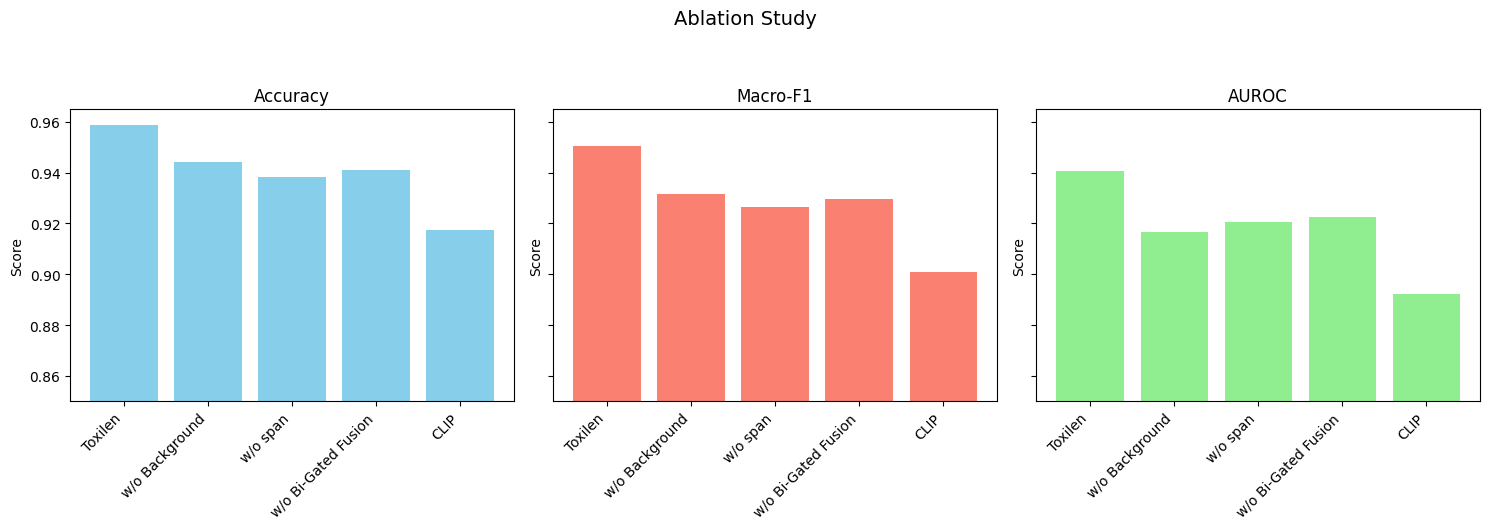

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# 模型表现数据
data = {
    "Model": ["Toxilen", "w/o Background", "w/o span", "w/o Bi-Gated Fusion", "CLIP"],
    "Accuracy": [0.9588 ,0.9441, 0.9382, 0.9412, 0.9176],
    "Macro-F1": [ 0.9504 ,0.9317, 0.9263, 0.9296, 0.9008],
    "AUROC": [0.9407 ,0.9167, 0.9206, 0.9227, 0.8923]
}

df = pd.DataFrame(data)

# 设置画布
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# 每张图展示一个指标
metrics = ["Accuracy", "Macro-F1", "AUROC"]
colors = ['skyblue', 'salmon', 'lightgreen']

for i, metric in enumerate(metrics):
    axes[i].bar(df["Model"], df[metric], color=colors[i])
    axes[i].set_title(metric)
    axes[i].set_ylim(0.85, 0.965)
    axes[i].set_ylabel("Score")
    axes[i].set_xticklabels(df["Model"], rotation=45, ha="right")

plt.tight_layout()
plt.suptitle("Ablation Study", fontsize=14, y=1.05)
plt.subplots_adjust(top=0.85)

plt.show()


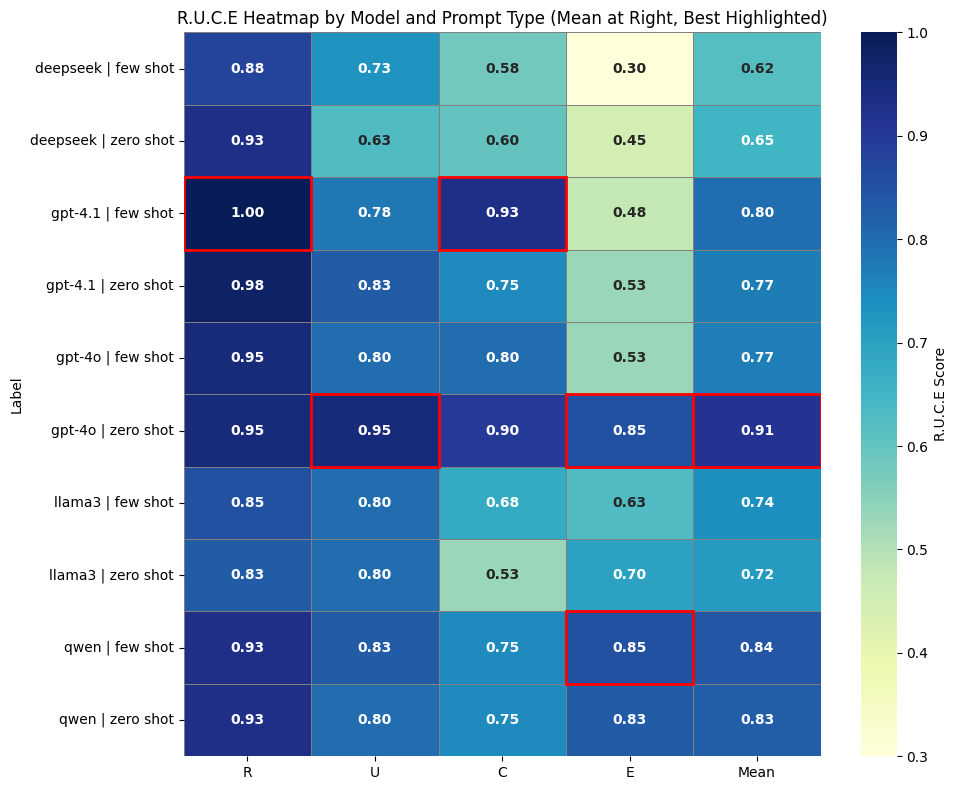

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 原始数据
data = [
    ("deepseek", "few shot", 0.88, 0.73, 0.58, 0.30),
    ("deepseek", "zero shot", 0.93, 0.63, 0.60, 0.45),
    
    ("gpt-4.1", "few shot", 1.00, 0.78, 0.93, 0.48),
    ("gpt-4.1", "zero shot", 0.98, 0.83, 0.75, 0.53),
    
    ("gpt-4o", "few shot", 0.95, 0.80, 0.80, 0.53),
    ("gpt-4o", "zero shot", 0.95, 0.95, 0.90, 0.85),
    
    ("llama3", "few shot", 0.85, 0.80, 0.68, 0.63),
    ("llama3", "zero shot", 0.83, 0.80, 0.53, 0.70),
    
    ("qwen", "few shot", 0.93, 0.83, 0.75, 0.85),
    ("qwen", "zero shot", 0.93, 0.80, 0.75, 0.83),
]

# 创建 DataFrame
df = pd.DataFrame(data, columns=["Model", "Prompt", "R", "U", "C", "E"])
df["Mean"] = df[["R", "U", "C", "E"]].mean(axis=1)
df["Label"] = df["Model"] + " | " + df["Prompt"]

# 重排列顺序并设定索引
heatmap_data = df.set_index("Label")[["R", "U", "C", "E", "Mean"]]

# 行顺序
order = [
    "deepseek | few shot", "deepseek | zero shot",
    "gpt-4.1 | few shot", "gpt-4.1 | zero shot",
    "gpt-4o | few shot", "gpt-4o | zero shot",
    "llama3 | few shot", "llama3 | zero shot",
    "qwen | few shot", "qwen | zero shot"
]
heatmap_data = heatmap_data.reindex(order)

# 找到每列最大值位置，用于高亮
mask = heatmap_data == heatmap_data.max()

# 画图
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="YlGnBu",
    cbar_kws={"label": "R.U.C.E Score"},
    linewidths=0.5,  # 分割线
    linecolor='gray',
    fmt=".2f",
    annot_kws={"weight": "bold"},
)

# 高亮最大值（加红框）
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        if mask.iloc[i, j]:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=2))

plt.title("R.U.C.E Heatmap by Model and Prompt Type (Mean at Right, Best Highlighted)")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

pred = pd.read_csv('predictions.csv')
labels = pd.read_csv('labels.csv')
print(classification_report(labels, pred))

In [9]:
import pandas as pd

In [11]:
df = pd.read_csv('test_results.csv')
y_pred = df['predictions']
y_true = df['labels']

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       236
           1       0.97      0.89      0.93       104

    accuracy                           0.96       340
   macro avg       0.96      0.94      0.95       340
weighted avg       0.96      0.96      0.96       340



Confusion Matrix:
[[233   3]
 [ 11  93]]


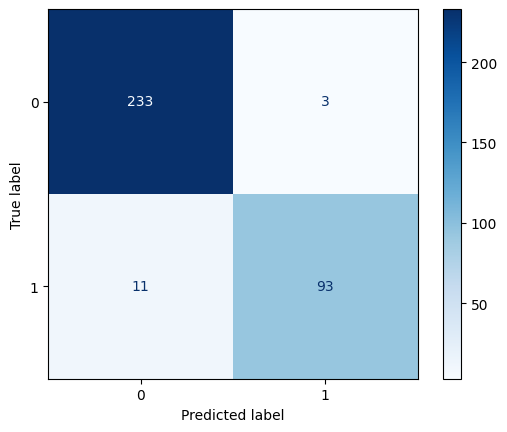

In [ ]:
toxilen_results = pd.read_csv('test_results.csv')
y_pred = toxilen_results['predictions']
y_true = toxilen_results['labels']

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 假设这是你的真实标签和预测标签

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 打印矩阵
print("Confusion Matrix:")
print(cm)

# 可视化混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # 你也可以换成其他颜色映射
plt.show()


In [13]:
f = pd.read_csv("CUET_320_run1.csv", header=None)
f.columns = ['filename', 'predictions']

# 给 filename 列每个值加上 .jpg
f['filename'] = f['filename'].astype(str) + ".jpg"


In [14]:
labels = pd.read_csv("data/cindy/all/test.csv")

In [15]:
merged = pd.merge(f, labels, on='filename', how='left')
merged

,filename,predictions,label,text
0,30.jpg,0,0,命缩力 身上透露出一种淡淡的死感 不想死，但也没那么想活 仿生
1,33.jpg,0,0,很内向 吃饱了也不说 一直吃
2,44.jpg,0,0,周一的工位上有两个人 一个是我 另 一个也是我 因为我裂开了
3,45.jpg,1,1,女人都是吃鸡的怪物
4,59.jpg,0,0,你能帮我上个厕所吗？谢谢
...,...,...,...,...
335,1688.jpg,0,0,我就知道
336,1689.jpg,0,0,难道聪明的我被骗了
337,1691.jpg,0,0,一级焦虑： 一觉醒来客厅坐满了亲戚 你的七大姑八大姨 必须要打招呼倒水的你
338,1692.jpg,0,0,再说就烦了


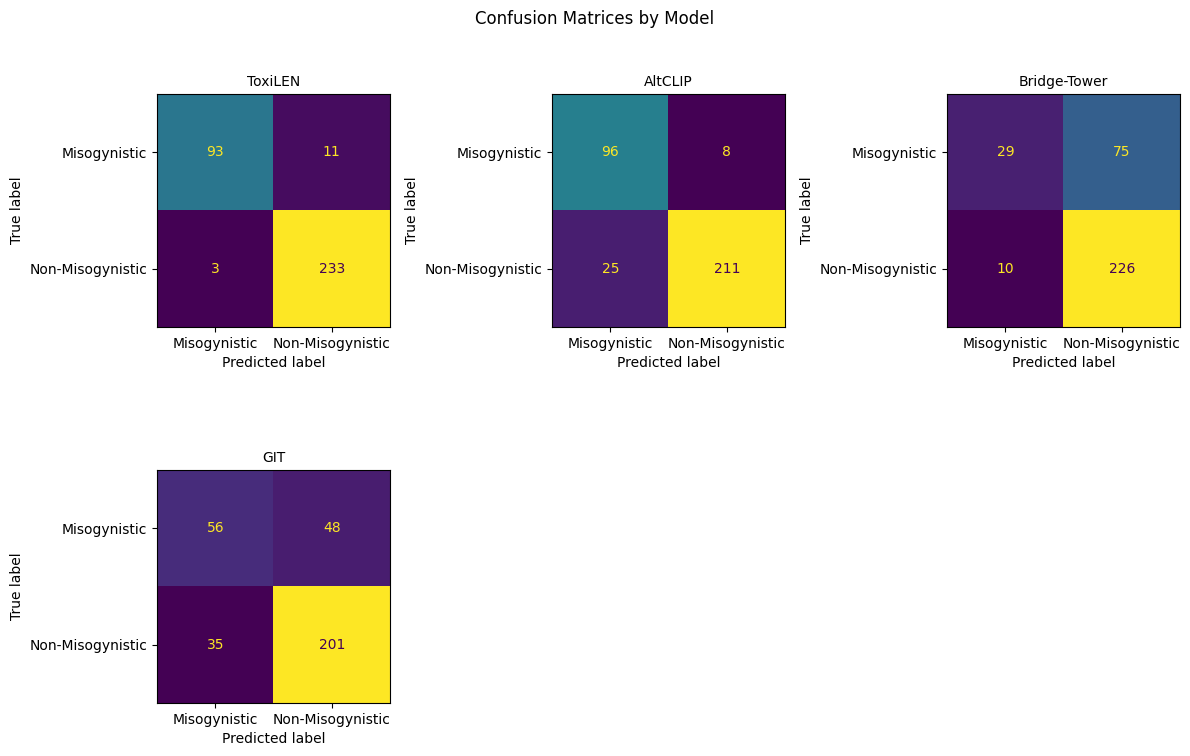

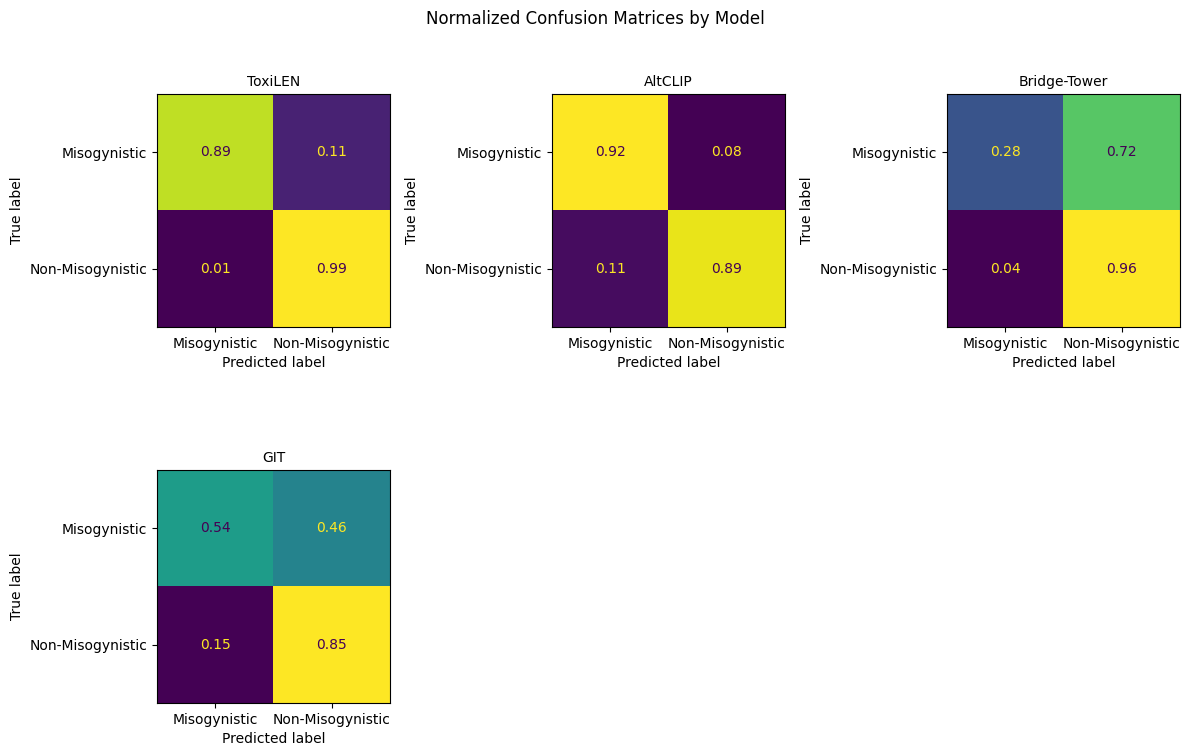

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ===== 真实数据计算 ToxiLEN 混淆矩阵 =====
toxilen_results = pd.read_csv('test_results.csv')
y_true = toxilen_results['labels']
y_pred = toxilen_results['predictions']
cm_toxilen = confusion_matrix(y_true, y_pred, labels=[1, 0])  # [ [TP,FN], [FP,TN] ]
cm_cuet = confusion_matrix(merged['labels'], merged['predictions'], labels=[1, 0])  # [ [TP,FN], [FP,TN] ]

# ===== 基本参数 =====
N_total = len(y_true)
N_pos = (y_true == 1).sum()
N_neg = N_total - N_pos
class_names = ["Misogynistic", "Non-Misogynistic"]

# ===== 通过 per-class precision / recall / support 反推混淆矩阵 =====
def cm_from_per_class_metrics(p0, r0, s0, p1, r1, s1):
    """
    类别 1 = 正类（Misogynistic）
    类别 0 = 负类（Non-Misogynistic）
    """
    TP = int(round(r1 * s1))
    FN = s1 - TP
    FP = int(round(TP / p1 - TP)) if p1 > 0 else 0
    TN = s0 - FP
    return np.array([[TP, FN], [FP, TN]], dtype=int)

# ===== 绘图函数 =====
def plot_many_confusions(cms_dict, normalize=False, title="Confusion Matrices"):
    names = list(cms_dict.keys())
    k = len(names)
    ncols = 3 if k >= 3 else k
    nrows = int(math.ceil(k / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    if k == 1:
        axes = np.array([[axes]])
    elif nrows == 1:
        axes = np.array([axes])

    for i, name in enumerate(names):
        r, c = divmod(i, ncols)
        ax = axes[r, c]
        cm = cms_dict[name]

        if normalize:
            cm_plot = cm.astype(float)
            row_sum = cm_plot.sum(axis=1, keepdims=True)
            cm_plot = cm_plot / np.clip(row_sum, 1, None)
            fmt = ".2f"
        else:
            cm_plot = cm.astype(int)
            fmt = "d"

        disp = ConfusionMatrixDisplay(confusion_matrix=cm_plot, display_labels=class_names)
        disp.plot(ax=ax, colorbar=False, values_format=fmt)
        ax.set_title(name, loc='center', fontsize=10)

    for j in range(k, nrows*ncols):
        r, c = divmod(j, ncols)
        axes[r, c].axis("off")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# ===== 模型 per-class 指标（p0,r0,s0,p1,r1,s1），空的留 None 等你填 =====
models_data = {
    "ToxiLEN": None,  # 用真实预测,
    "CUET-320":None,
    "AltCLIP": {"p0":  0.9635 , "r0":0.8941, "s0": N_neg,
                "p1": 0.7934, "r1": 0.9231, "s1": N_pos},
    "Bridge-Tower": {"p0": 0.7508, "r0":  0.9576, "s0": N_neg,
                "p1":  0.7436, "r1":  0.2788 , "s1": N_pos},
    "GIT": {"p0": 0.8072, "r0":  0.9576, "s0": N_neg,
                "p1":  0.6154, "r1": 0.5385 , "s1": N_pos},
    "BLIP": {"p0": 0.8118 , "r0":    0.9322, "s0": N_neg,
                "p1":  0.7681 , "r1": 0.5096 , "s1": N_pos}
    }


# ===== 组合所有模型的混淆矩阵 =====
cms = {}
cms["ToxiLEN"] = cm_toxilen
cms["CUET-320"] = cm_cuet
for name, metr in models_data.items():
    if name == "ToxiLEN":
        continue
    if name == "CUET-320":
        continue
    if metr and None not in (metr["p0"], metr["r0"], metr["p1"], metr["r1"]):
        cms[name] = cm_from_per_class_metrics(
            metr["p0"], metr["r0"], metr["s0"],
            metr["p1"], metr["r1"], metr["s1"]
        )

# ===== 绘图 =====
plot_many_confusions(cms, normalize=False, title="Confusion Matrices by Model")
plot_many_confusions(cms, normalize=True, title="Normalized Confusion Matrices by Model")
